In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
from scipy.stats import norm, ttest_ind, shapiro

In [26]:
path = "C:\\Users\\ROfl\\Desktop\\MS\\MatStat\\3"
os.chdir(path)

CFD = pd.read_excel("CHISLO_DOCTORS.xlsx", sheet_name='ROSSTAT')

CFD = CFD.iloc[90:101]
CFD = CFD.iloc[:, :13]
CFD = CFD.drop(CFD.columns[[1,2,3,4,5,6]], axis=1)
CFD.columns = ['Название области', '2005', '2010', '2015','2019', '2020', '2021' ]
CFD.set_index('Название области', inplace=True)

CFD = CFD.astype(float).copy()

print(CFD)

                               2005  2010  2015  2019  2020  2021
Название области                                                 
Республика Бурятия             38.6  41.3  45.6  45.1  44.7  43.4
Республика Саха (Якутия)       49.3  57.1  55.2  61.6  60.3  60.0
Забайкальский край             52.5  56.1  48.8  50.9  52.3  50.9
Камчатский край                53.2  49.3  53.6  52.9  52.5  54.9
Приморский край                53.5  52.7  50.0  51.8  51.1  50.8
Хабаровский край               60.5  61.1  53.5  56.4  57.5  56.4
Амурская область               60.7  62.8  55.4  54.9  55.4  56.8
Магаданская область            55.2  55.6  61.0  62.2  62.4  63.1
Сахалинская область            44.0  49.1  54.1  63.6  64.6  65.5
Еврейская автономная  область  37.0  35.4  37.9  38.0  37.6  35.2
Чукотский автономный округ     78.8  76.7  65.0  71.0  73.7  74.1


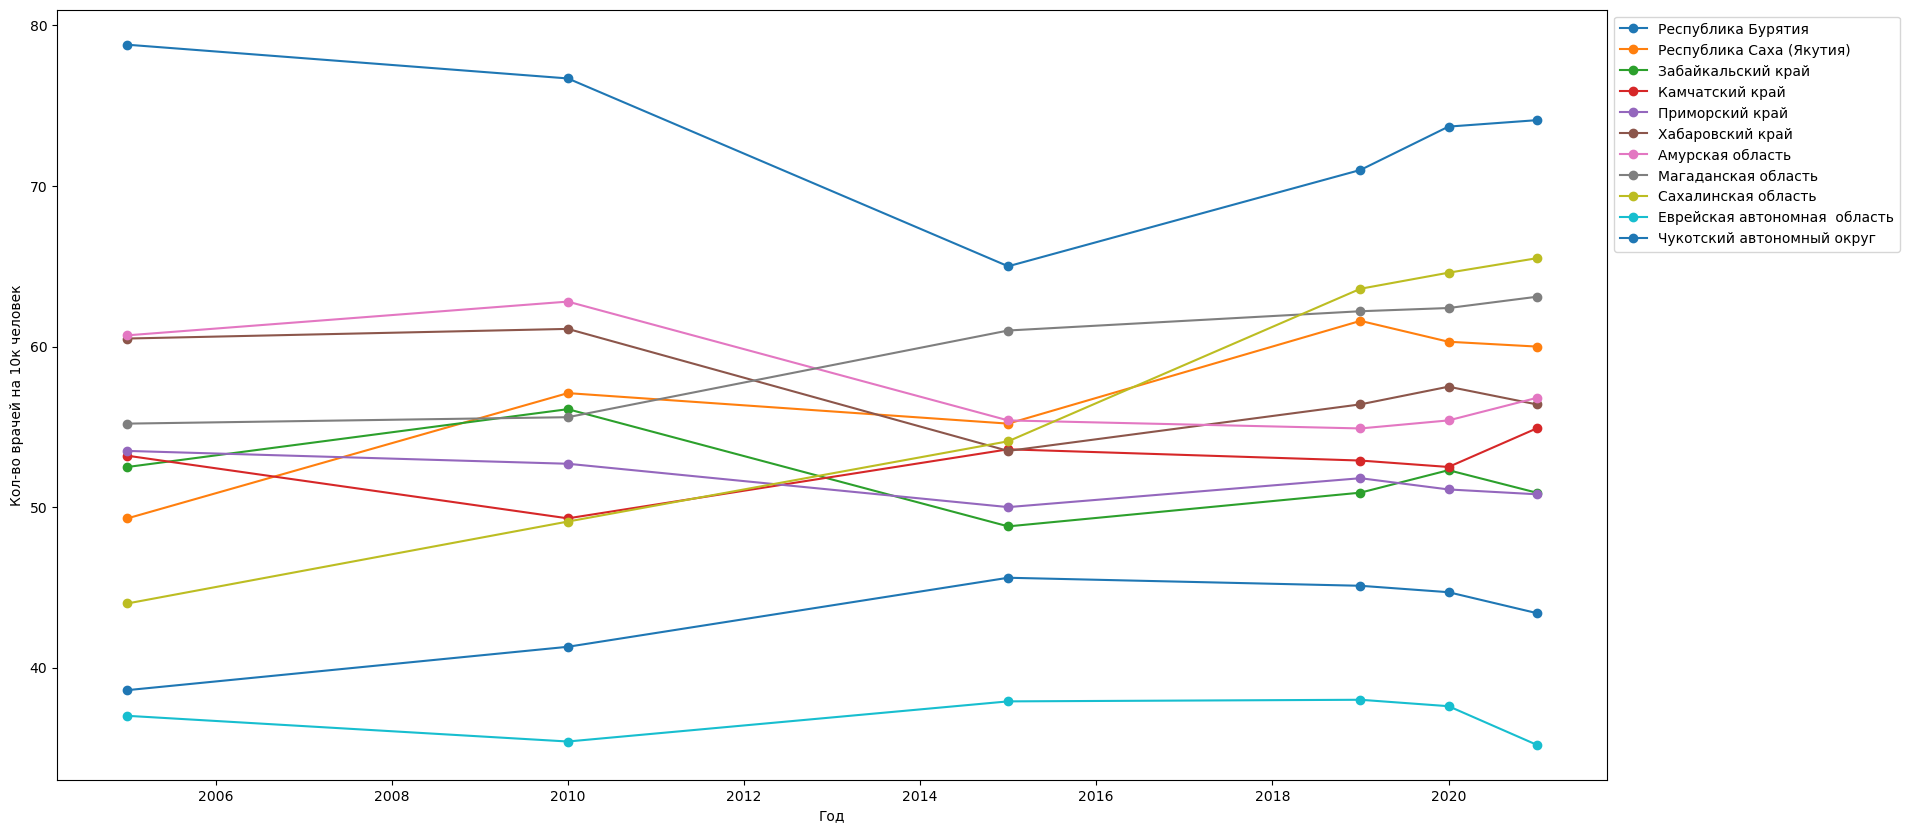

In [3]:
plt.figure(figsize=(20, 10))
years = [2005, 2010, 2015, 2019, 2020, 2021]
for i in range(len(CFD.index)):
    y = CFD.iloc[i]
    plt.plot(years, y, marker='o')
    plt.xlabel('Год')
    plt.ylabel('Кол-во врачей на 10к человек') 

plt.legend(CFD.index, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

2. Визуализировать данные показателя X в каждый год периода T по указанному в
Вашем варианте Федеральному Округу с помощью графиков и боксплотов.

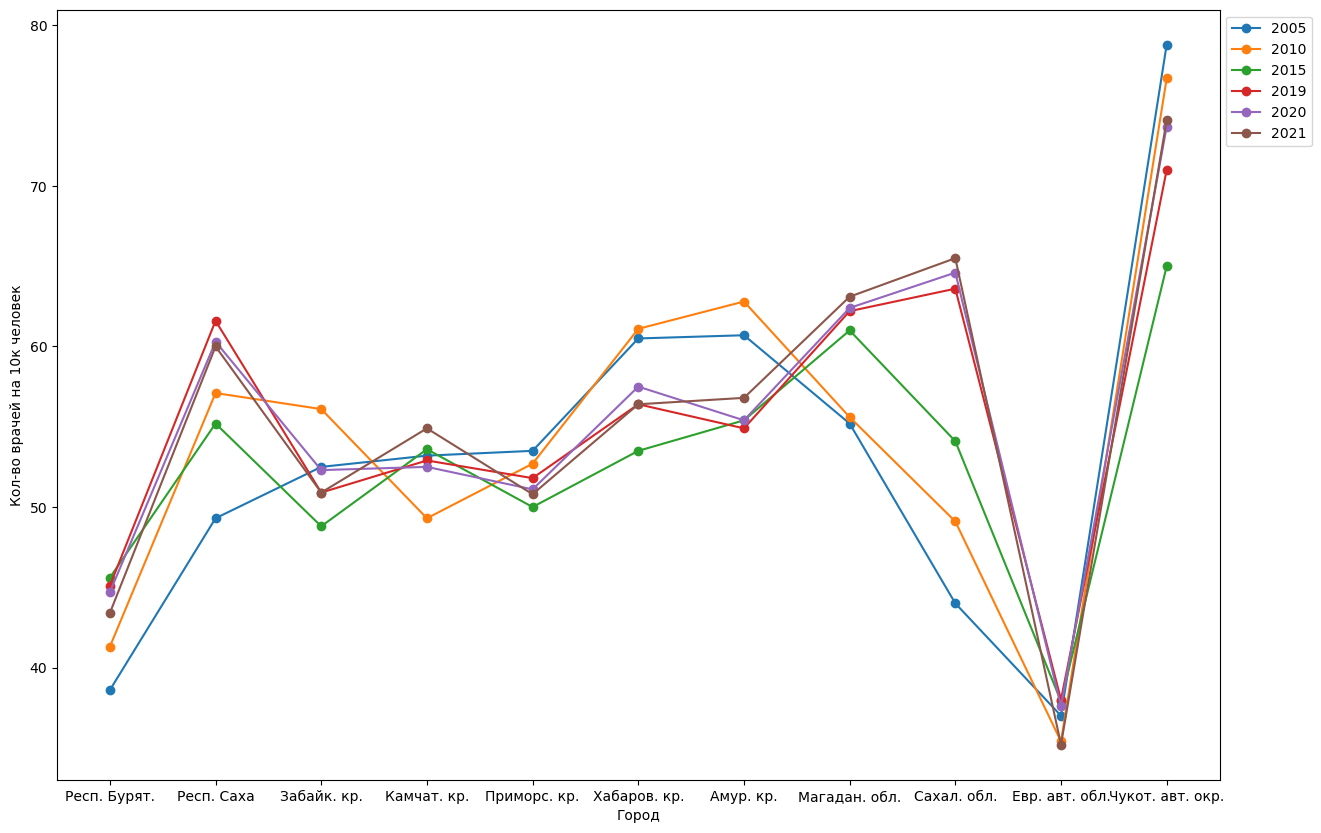

In [4]:
plt.figure(figsize=(15, 10))
cities = ["Респ. Бурят.", "Респ. Саха", "Забайк. кр.", "Камчат. кр.", "Приморс. кр.", "Хабаров. кр.", "Амур. кр.", "Магадан. обл.", "Сахал. обл.", "Евр. авт. обл.", "Чукот. авт. окр."]
for i in range(len(CFD.columns)):
    y = CFD.iloc[:, i]
    plt.plot(cities, y, marker='o')
    plt.xlabel('Город')
    plt.ylabel('Кол-во врачей на 10к человек') 

plt.legend(CFD.columns, loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

#plt.figure(figsize=(15, 10))
#cities = ["Респ. Бурят.", "Респ. Саха", "Забайк. кр.", "Камчат. кр.", "Приморс. кр."]
#for i in range(len(CFD.columns)):
#    y = CFD.iloc[:5, i]
#    plt.plot(cities, y, marker='o')
#    plt.xlabel('Город')
#    plt.ylabel('Кол-во врачей на 10к человек') 
#
#plt.legend(CFD.columns, loc='upper left', bbox_to_anchor=(1, 1))
#plt.show()
#
#plt.figure(figsize=(15, 10))
#cities = ["Хабаров. кр.", "Амур. кр.", "Магадан. обл.", "Сахал. обл.", "Евр. авт. обл.", "Чукот. авт. окр."]
#for i in range(len(CFD.columns)):
#    y = CFD.iloc[5:, i]
#    plt.plot(cities, y, marker='o')
#    plt.xlabel('Город')
#    plt.ylabel('Кол-во врачей на 10к человек') 
#
#plt.legend(CFD.columns, loc='upper left', bbox_to_anchor=(1, 1))
#plt.show()


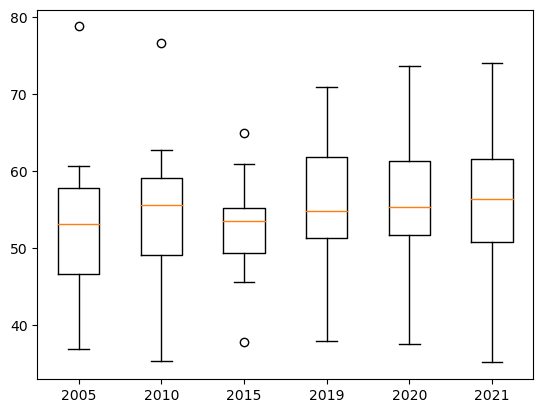

In [5]:
# Построение боксплота
data = [CFD.iloc[:, i].values for i in range(len(CFD.columns))]
plt.boxplot(data, labels=CFD.columns)
plt.show()

3. Вычислить описательную статистику: среднее, стандартное отклонение, квартили,
минимальное и максимальное значения показателя X в каждый год периода T по
указанному в Вашем варианте Федеральному Округу.

In [16]:
for i in range(0, 6):
    print(CFD.iloc[:, i].describe(),"\n")

count    11.000000
mean     53.027273
std      11.595697
min      37.000000
25%      46.650000
50%      53.200000
75%      57.850000
max      78.800000
Name: 2005, dtype: float64 

count    11.000000
mean     54.290909
std      11.017391
min      35.400000
25%      49.200000
50%      55.600000
75%      59.100000
max      76.700000
Name: 2010, dtype: float64 

count    11.000000
mean     52.736364
std       7.273689
min      37.900000
25%      49.400000
50%      53.600000
75%      55.300000
max      65.000000
Name: 2015, dtype: float64 

count    11.000000
mean     55.309091
std       9.191023
min      38.000000
25%      51.350000
50%      54.900000
75%      61.900000
max      71.000000
Name: 2019, dtype: float64 

count    11.000000
mean     55.645455
std       9.818998
min      37.600000
25%      51.700000
50%      55.400000
75%      61.350000
max      73.700000
Name: 2020, dtype: float64 

count    11.000000
mean     55.554545
std      10.623311
min      35.200000
25%      50.850000


4. Проверить, можно ли считать, что распределение случайной величины X в указанном
Федеральном Округе в каждый год периода Т подчинено нормальному закону
распределения. Использовать для проверки тест Шапиро-Уилка (уровень значимости ALPHA указан в Вашем варианте)

In [27]:
ALPHA = 0.025  # Уровень значимости

normal_columns = list()
not_normal_columns = list()

for i in range(0, 6):
    # Проведение теста Шапиро-Уилка
    stat, p_value = stats.shapiro(CFD.iloc[:, i])

    # Вывод результатов
    print(f"Результаты теста Шапиро-Уилка - {i}:")
    print(f"Статистика теста: {stat:.4f}")
    print(f"P-значение: {p_value:.4f}")


    # Проверка гипотезы
    # H0: CFD - normal distribution
    # H1: CFD - NOT normal distribution
    if p_value > ALPHA:
        print(f"Гипотеза о нормальности НЕ отвергается на уровне значимости {ALPHA}.")
        print("Распределение можно считать нормальным.")
        normal_columns.append(i)
    else:
        print(f"Гипотеза о нормальности отвергается на уровне значимости {ALPHA}.")
        print("Распределение нельзя считать нормальным.")
        not_normal_columns.append(i)

    print("\n")
    
print(normal_columns)
print(not_normal_columns)


Результаты теста Шапиро-Уилка - 0:
Статистика теста: 0.9309
P-значение: 0.4202
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.025.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 1:
Статистика теста: 0.9706
P-значение: 0.8921
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.025.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 2:
Статистика теста: 0.9620
P-значение: 0.7966
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.025.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 3:
Статистика теста: 0.9830
P-значение: 0.9804
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.025.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 4:
Статистика теста: 0.9880
P-значение: 0.9946
Гипотеза о нормальности НЕ отвергается на уровне значимости 0.025.
Распределение можно считать нормальным.


Результаты теста Шапиро-Уилка - 5:
Статистика теста: 0.9842


Название области
Республика Бурятия               43.4
Республика Саха (Якутия)         60.0
Забайкальский край               50.9
Камчатский край                  54.9
Приморский край                  50.8
Хабаровский край                 56.4
Амурская область                 56.8
Магаданская область              63.1
Сахалинская область              65.5
Еврейская автономная  область    35.2
Чукотский автономный округ       74.1
Name: 2021, dtype: float64

5. Выделить те года t1-tm с нормально распределенными значениями рядов данных Xt1-
Xtm, где Xt1- Xtm имеют одинаковую дисперсию (уровень значимости взять равным ALPHA).
Использовать для проверки нулевой гипотезы о равенстве дисперсий тесты Бартлетта и
Левена.

In [20]:
# H0: D(0) = D(1)
# H1: D(0) != D(1)
import itertools
columns = CFD.columns[normal_columns]
pairs = itertools.combinations(columns, 2)
for col1, col2 in pairs:
    group_1 = CFD[col1]
    group_2 = CFD[col2]
    
    bartlett_stat, bartlett_p_value = stats.bartlett(group_1, group_2)
    print(f'Бартлетт (столбцы {col1} и {col2}): stat = {bartlett_stat:.4f}, p-value = {bartlett_p_value:.4f}')
    if bartlett_p_value > ALPHA:
        print(f"\tГипотеза H0 о равенстве дисперсий принимается.\n")
    else:
        print(f"\tГипотеза H0 отвергается. Дисперсии значимо различаются.\n")

    levene_stat, levene_p_value = stats.levene(group_1, group_2)
    print(f'Левен (столбцы {col1} и {col2}): stat = {levene_stat:.4f}, p-value = {levene_p_value:.4f}')
    if levene_p_value > ALPHA:
        print(f"\tГипотеза H0 о равенстве дисперсий принимается.\n")
    else:
        print(f"\tГипотеза H0 отвергается. Дисперсии значимо различаются.\n")

    print('---------------------------------------------------------------')

Бартлетт (столбцы 2005 и 2010): stat = 0.0249, p-value = 0.8746
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2010): stat = 0.0013, p-value = 0.9720
	Гипотеза H0 о равенстве дисперсий принимается.

---------------------------------------------------------------
Бартлетт (столбцы 2005 и 2015): stat = 2.0004, p-value = 0.1573
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2015): stat = 1.0426, p-value = 0.3194
	Гипотеза H0 о равенстве дисперсий принимается.

---------------------------------------------------------------
Бартлетт (столбцы 2005 и 2019): stat = 0.5098, p-value = 0.4752
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2019): stat = 0.1173, p-value = 0.7356
	Гипотеза H0 о равенстве дисперсий принимается.

---------------------------------------------------------------
Бартлетт (столбцы 2005 и 2020): stat = 0.2622, p-value = 0.6086
	Гипотеза H0 о равенстве дисперсий принимается.

Левен (столбцы 2005 и 2020

6. Проверить, можно ли считать, что среднее значение показателя X по данному
Федеральному Округу в каждый год периода t1-tm значимо выше (ниже)
общероссийского значения показателя X (уровень значимости взять равным ALPHA).
Общероссийские значения показателя X найти в файле CHISLO_DOCTORS.xlsx.
Использовать для проверки гипотезы о равенстве средних t-тест для одной выборки

In [9]:
df = pd.read_excel("CHISLO_DOCTORS.xlsx",sheet_name='ROSSTAT')

df_RU = df.iloc[[3], 7:13]
df_RU.columns = ['2005', '2010','2015','2019', '2020', '2021' ]
df_RU.insert(0, 'Название', ['РФ'])
df_RU.set_index("Название", inplace=True)

print(df_RU)

          2005  2010  2015  2019  2020  2021
Название                                    
РФ        48.6  50.1  45.9  48.7  50.4  51.0


In [14]:
for i in normal_columns:
    sample = CFD.iloc[:, i]
    sample_mean = sample.mean()
    ru_mean = df_RU.iloc[0, i]
    if sample_mean < ru_mean: 
        # H0 : sample = ru_mean
        # H1 : sample < ru_mean
        t_statistic, p_value = stats.ttest_1samp(sample, ru_mean, alternative="less")
        print(p_value)
        if p_value < ALPHA:
            print("Среднее значение выборки статистически меньше среднего по РФ")
        else:
            print("Нет статистически значимого различия (меньше)\n")
    else:
        # H0 : sample = ru_mean
        # H1 : sample > ru_mean
        t_statistic, p_value = stats.ttest_1samp(sample, ru_mean, alternative="greater")
        print(p_value)
        if p_value < ALPHA:
            print("Среднее значение выборки статистически больше среднего по РФ")
        else:
            print("Нет статистически значимого различия (больше)\n")
            

0.1170541646816968
Нет статистически значимого различия (больше)

0.11786104972520446
Нет статистически значимого различия (больше)

0.0054628211616627575
Среднее значение выборки статистически больше среднего по РФ
0.01914461641241341
Среднее значение выборки статистически больше среднего по РФ
0.053420844765322544
Нет статистически значимого различия (больше)

0.09273739609821346
Нет статистически значимого различия (больше)



7. Проверить, можно ли считать, что различия между средними значениями показателя
X по данному Федеральному Округу в какие-то два года из периода t1-tm незначимы,
появились случайно (уровень значимости взять равным ALPHA). Использовать для проверки
гипотезы о равенстве средних t-тест для двух выборок.

In [11]:
import itertools
columns = CFD.columns[normal_columns]
pairs = itertools.combinations(columns, 2)
for col1, col2 in pairs:
    group_1 = CFD[col1].to_list()
    group_2 = CFD[col2].to_list()

    mean_1 = CFD[col1].mean()
    mean_2 = CFD[col2].mean()

    if mean_1 < mean_2: 
        t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='less')
        if p_value < ALPHA:
            print(f"Среднее значение выборки {col1} статистически меньше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между средними {col1} и {col2} (меньше)")
    else: 
        t_statistic, p_value = stats.ttest_ind(group_1, group_2, alternative='greater')
        if p_value < ALPHA:
            print(f"Среднее значение выборки {col1} статистически больше выборки {col2}")
        else:
            print(f"Нет статистически значимого различия между средними {col1} и {col2} (больше)")
    print(f"P_value:{p_value}")
    print("************************")

Нет статистически значимого различия между средними 2005 и 2010 (меньше)
P_value:0.3979935150843512
************************
Нет статистически значимого различия между средними 2005 и 2015 (больше)
P_value:0.47225315582835004
************************
Нет статистически значимого различия между средними 2005 и 2019 (меньше)
P_value:0.30731154760389073
************************
Нет статистически значимого различия между средними 2005 и 2020 (меньше)
P_value:0.2870168555423867
************************
Нет статистически значимого различия между средними 2005 и 2021 (меньше)
P_value:0.29995500917561513
************************
Нет статистически значимого различия между средними 2010 и 2015 (больше)
P_value:0.3501334159668047
************************
Нет статистически значимого различия между средними 2010 и 2019 (меньше)
P_value:0.4081601363128079
************************
Нет статистически значимого различия между средними 2010 и 2020 (меньше)
P_value:0.3819784845452395
**********************

8. Проверить значимость отличий средних в выбранной группе (уровень значимости
взять равным ALPHA). Использовать для проверки гипотезы о равенстве средних групп тест
Тьюки и односторонний тест ANOVA

In [12]:
data = []
for column in CFD.columns[normal_columns]:
    data.append(CFD[column])

# print(data)
result = stats.tukey_hsd(*data)
print(result.pvalue)
print(result)

[[1.         0.99968047 0.99999978 0.9945419  0.98970147 0.99123999]
 [0.99968047 1.         0.99912339 0.99988947 0.99955126 0.99968047]
 [0.99999978 0.99912339 1.         0.99049383 0.98342508 0.98562362]
 [0.9945419  0.99988947 0.99049383 1.         0.99999955 0.99999991]
 [0.98970147 0.99955126 0.98342508 0.99999955 1.         1.        ]
 [0.99123999 0.99968047 0.98562362 0.99999991 1.         1.        ]]
Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -1.264     1.000   -13.842    11.315
 (0 - 2)      0.291     1.000   -12.288    12.869
 (0 - 3)     -2.282     0.995   -14.860    10.297
 (0 - 4)     -2.618     0.990   -15.197     9.960
 (0 - 5)     -2.527     0.991   -15.106    10.051
 (1 - 0)      1.264     1.000   -11.315    13.842
 (1 - 2)      1.555     0.999   -11.024    14.133
 (1 - 3)     -1.018     1.000   -13.597    11.560
 (1 - 4)     -1.355     1.000   -13.933    11.224
 (1 - 5)     -1.2

In [25]:
data = []
for column in CFD.columns[normal_columns]:
    data.append(CFD[column])

statistic, p_value = stats.f_oneway(*data)
print(statistic, p_value)
if p_value < ALPHA:
    print(f"Существенные статистические различия между средними выборок")
else:
    print(f"Нет статистически значимого различия между средними выборок")

0.18338017917099453 0.9678265807186681
Нет статистически значимого различия между средними выборок
